# Example: $\beta$-lactamases

In [1]:
cd ../

/Users/sam/Documents/GitHub/alignment-tools


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA

from __init__ import *
from sequence_logo import *

In [3]:
import importlib
import __init__

In [4]:
# importlib.reload(__init__)
# from __init__ import *

I've downloaded an alignment of approximately 5,000 $\beta$-lactamase sequences from Pfam. We can start by loading the alignment. This alignment is quite large, so I will make sure that it does not by default calculate the position-wise frequencies in the alignment:

In [5]:
bla15_aln = readAlignment("example_files/alignments/beta_lactamases_pfam_rp15.fa")
print(bla15_aln)

Alignment with 5011 rows and 1653 columns
FEQNFRDGWE-----------P-EG-A-S---------------...--- A0A0N4WS98/47-410
FERNFRDGWE-----------S-VG-A-A---------------...--- A0A0N4WS98/446-766
-RRNFRDGWE-----------S-VG-A-A---------------...--- A0A0N4WS98/808-1154
IEALIAEEMA--------RRHI-PG-L-S---------------...--- A0A517SIU4/36-364
-------------------KNI-PA-F-S---------------...--- A0A517SIU4/417-716
--DRVSEAIS--------NRGI-PG-L-S---------------...--- A0A1P8WNG2/35-358
--QAVKIEVE--------QKQL-PA-F-S---------------...--- A0A1P8WNG2/388-714
------DGLE-----------T-DG-A-A---------------...L-- A0A183ILD0/40-400
-----------------------EG-A-A---------------...--- A0A183ILD0/414-805
FRSNFVDGWE-----------R-GG-A-A---------------...L-- A0A3P7VNF1/49-364
--------------------------------------------...--- A0A3P7VNF1/367-662
----LEARAA--------TLDA-PG-F-T---------------...--- I0IH98/31-350
-EAAVRGIVG--------GSAV-RR-A-A---------------...--- I0IH98/379-668
--------------------NI-PG-L-T---------------...--- A0A1S3IBK9

In [7]:
x = np.random.choice(bla15_aln.ids,30)
bla15_aln.search_ids(x)

TypeError: object of type 'type' has no len()

This alignment is quite long, and from the above I suspect that many columns are almost all gaps. To get a better sense of this, I will calculate the alignment coverage.

Text(0.5, 0, 'Alignment position')

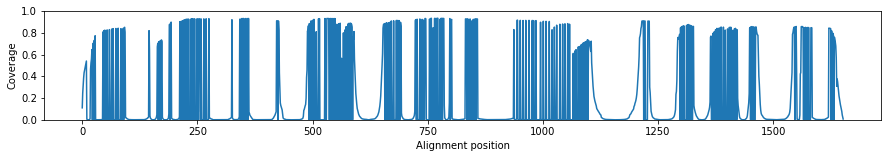

In [6]:
plt.figure(figsize=(15,2))
plt.plot(bla15_aln.calc_coverage())
plt.ylim(0,1)
plt.ylabel('Coverage')
plt.xlabel('Alignment position')

I am going to threshold this alignment to only keep positions that are at least 50% conserved. (Later I will get into other ways to do this based on alignment probability thresholds!)

Note that because I previously called bla15_aln.calc_coverage(), bla15_aln now has a .coverage attribute.

In [7]:
bla15_aln = bla15_aln[:,bla15_aln.coverage > 0.5]
print(bla15_aln)

Alignment with 5011 rows and 310 columns
GWE--PEGASLAVFVKGRKVVDLWGGYADKQAARIWKEDTVTVT...MKA A0A0N4WS98/47-410
GWE--SVGAAFAVFVKGRKVVDLWGGYADKQAARPWKEDTLMIT...LKA A0A0N4WS98/446-766
GWE--SVGAAFAVFVKGRAVVDLWGGYADKQAAQPWKEDTLMVT...LKA A0A0N4WS98/808-1154
EMARHIPGLSICVATDNEIQFERGFGLADVENGLPVTVETKFRT...QG- A0A517SIU4/36-364
---KNIPAFSISLVDGDRVVWAQGFGTARADGNVPATADSLYRV...--- A0A517SIU4/417-716
AISRGIPGLSLAIGHDNQVCYSKGFGLADVEHDVRASTDTRYRT...QNT A0A1P8WNG2/35-358
EVEKQLPAFSISLVDNDRMVWADGSGFQDAKQSRPATSDTVYRV...DGS A0A1P8WNG2/388-714
GLE--TDGAAFAVYKDGVAVVDLWGGYANVSSRKPWEKDTMAIV...MKP A0A183ILD0/40-400
------EGAAFSVYVDGKLVVDVWGGYADYSTNREWKADTMGLW...MKL A0A183ILD0/414-805
GWE--RGGAAFVVYFNGKKVVDLWGGYADKECGRLWRKDTLNVA...LKV A0A3P7VNF1/49-364
------------LYDVGQCVVDIWGGFADRESERRWREDTLQII...--- A0A3P7VNF1/367-662
RAALDAPGFTAAVLRGGDLATHAG-GFRDEGETEAMRPGDRFRL...SAE I0IH98/31-350
IVGSAVRRAAVVVVEDGRASEPLGAG--------SADGSGRFRA...--- I0IH98/379-668
----NIPGLTLAVVKDGEVVISKGYGVKDVVSKEPVTNTTLFNI...RES A0A1S3IBK9/

Much better! Now I want to check to make sure that all sequences are aligned to all of the key features of beta lactamase, so I am going to make a histogram of the sequence lengths fo this new filtered alignment. I want to do this *after* filtering the positions because I am interested in how many positions aligned to the core conserved positions, not just the total length of the sequences.

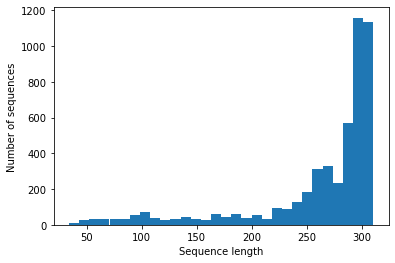

In [8]:
plt.xlabel('Sequence length')
plt.ylabel('Number of sequences')
plt.hist(bla15_aln.sequence_lengths(), bins=30); None

As you can see, the majority of sequences are aligned at at least 250 positions, but there are a decent number that were either fragments to start out with or did not align properly to the core conserved fold. I will filter out those sequences shorter than 225 aa:

In [9]:
bla15_aln = bla15_aln[bla15_aln.sequence_lengths() > 225]
print(bla15_aln)

Alignment with 4162 rows and 310 columns
GWE--PEGASLAVFVKGRKVVDLWGGYADKQAARIWKEDTVTVT...MKA A0A0N4WS98/47-410
GWE--SVGAAFAVFVKGRKVVDLWGGYADKQAARPWKEDTLMIT...LKA A0A0N4WS98/446-766
GWE--SVGAAFAVFVKGRAVVDLWGGYADKQAAQPWKEDTLMVT...LKA A0A0N4WS98/808-1154
EMARHIPGLSICVATDNEIQFERGFGLADVENGLPVTVETKFRT...QG- A0A517SIU4/36-364
---KNIPAFSISLVDGDRVVWAQGFGTARADGNVPATADSLYRV...--- A0A517SIU4/417-716
AISRGIPGLSLAIGHDNQVCYSKGFGLADVEHDVRASTDTRYRT...QNT A0A1P8WNG2/35-358
EVEKQLPAFSISLVDNDRMVWADGSGFQDAKQSRPATSDTVYRV...DGS A0A1P8WNG2/388-714
GLE--TDGAAFAVYKDGVAVVDLWGGYANVSSRKPWEKDTMAIV...MKP A0A183ILD0/40-400
------EGAAFSVYVDGKLVVDVWGGYADYSTNREWKADTMGLW...MKL A0A183ILD0/414-805
GWE--RGGAAFVVYFNGKKVVDLWGGYADKECGRLWRKDTLNVA...LKV A0A3P7VNF1/49-364
RAALDAPGFTAAVLRGGDLATHAG-GFRDEGETEAMRPGDRFRL...SAE I0IH98/31-350
IVGSAVRRAAVVVVEDGRASEPLGAG--------SADGSGRFRA...--- I0IH98/379-668
----NIPGLTLAVVKDGEVVISKGYGVKDVVSKEPVTNTTLFNI...RES A0A1S3IBK9/45-374
----NIPGLTLAVVKDGEVVISKGYGVKDVVSKEPVTNTTLFNI...RES A0A1S3IBK9/6

In [13]:
bla15_aln.calc_frequencies()

/Users/sam/Documents/GitHub/alignment-tools/MultipleSequenceAlignment.py:187: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  frequencies.sequence_weights = self.sequence_weights


,-,A,C,D,E,F,G,H,I,K,...,M,N,P,Q,R,S,T,V,W,Y
0,0.451706,0.091302,0.004085,0.006728,0.024507,0.048534,0.059827,0.011773,0.020903,0.011052,...,0.013455,0.014656,0.004085,0.020423,0.027391,0.035560,0.014656,0.019702,0.003123,0.041326
1,0.427919,0.024507,0.001442,0.006247,0.005046,0.014656,0.011533,0.004325,0.072802,0.009611,...,0.113167,0.007689,0.010091,0.014176,0.048294,0.010572,0.009851,0.105478,0.028352,0.004325
2,0.409659,0.134310,0.000240,0.084575,0.121816,0.001201,0.021144,0.007929,0.002403,0.062710,...,0.000240,0.016098,0.001201,0.040365,0.040125,0.022826,0.023787,0.006247,0.000240,0.000961
3,0.417828,0.030034,0.002643,0.024027,0.024267,0.010572,0.134070,0.036281,0.001682,0.043248,...,0.002162,0.034118,0.009851,0.036040,0.043489,0.030995,0.043489,0.004085,0.015617,0.035560
4,0.379625,0.051658,0.000721,0.047814,0.036521,0.001201,0.133590,0.028352,0.005526,0.072561,...,0.001922,0.051177,0.006007,0.043489,0.062230,0.025469,0.015617,0.016338,0.004325,0.002883
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,0.145843,0.024988,0.000961,0.015137,0.007208,0.001201,0.004325,0.014176,0.000240,0.006487,...,0.000000,0.576646,0.001201,0.098510,0.006728,0.048054,0.043729,0.001682,0.000240,0.000721
306,0.170111,0.062951,0.007208,0.021144,0.012254,0.011052,0.120855,0.022105,0.029313,0.037722,...,0.012975,0.034118,0.004085,0.035560,0.121576,0.105959,0.070639,0.031235,0.008169,0.016338
307,0.198462,0.050697,0.002643,0.062951,0.043969,0.040605,0.048054,0.005286,0.013936,0.018501,...,0.053820,0.059346,0.049736,0.036761,0.026670,0.059587,0.044450,0.075685,0.005286,0.014897
308,0.237866,0.038683,0.001922,0.058626,0.029793,0.012494,0.089380,0.058385,0.008650,0.043969,...,0.007208,0.058626,0.099471,0.019942,0.023066,0.071120,0.063431,0.018741,0.000961,0.042528


To get a better sense of the diversity in this alignment, I'd like to set sequence weights for each of these sequences based on  their number of neighbors. I have a function to do so based on the default sequence weighting from EVcouplings:

In [14]:
def cluster_sizes(ali, thresh):

    '''For each sequence in an alignment, calculate how many other sequences from the alignment are within 
        a given identity threshold of that sequence.'''
    
    try:
        imat = ali.identity_matrix 
    except:
        imat = CalcIdentityMatrix(ali)
    
    return np.array([np.sum(imat[i] > thresh) for i in range(ali.N)])

I'll start by calculating the percent identity matrix for each sequence and attaching this as an attribute of bla_aln. Since this will take a moment, this way it will be stored with the alignment and I won't have to calculate it again if I want to use it.

In [15]:
bla15_aln.identity_matrix = CalcIdentityMatrix(bla15_aln)

I can then set the sequence weights. The cluster_sizes() function will automatically known to use the .identity_matrix feature of bla15_aln, and bla15_aln's set_sequence_weights() function will add the weights into the alignment both as a feature of the alignment, .sequence_weights, and each one as a feature of its individual sequence record, as record.weight.

In [16]:
bla15_aln.set_sequence_weights(np.ones(bla15_aln.N) / cluster_sizes(bla15_aln, 0.8))
print('Neff:', np.sum(bla15_aln.sequence_weights))

Neff: 3809.9419681107693


In [17]:
bla15_aln.calc_frequencies()

/Users/sam/Documents/GitHub/alignment-tools/MultipleSequenceAlignment.py:187: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  frequencies.sequence_weights = self.sequence_weights


,-,A,C,D,E,F,G,H,I,K,...,M,N,P,Q,R,S,T,V,W,Y
0,0.459345,0.095496,0.003500,0.007087,0.024147,0.050219,0.056505,0.012730,0.022310,0.010709,...,0.012599,0.016011,0.004462,0.022048,0.029003,0.011330,0.015880,0.021260,0.003412,0.043833
1,0.435111,0.026072,0.001575,0.006824,0.005512,0.015355,0.010092,0.004200,0.074874,0.010368,...,0.109852,0.007874,0.011024,0.014917,0.026553,0.011286,0.010761,0.113440,0.025044,0.004724
2,0.416738,0.110552,0.000262,0.089962,0.123733,0.001312,0.021260,0.007472,0.002625,0.065268,...,0.000262,0.016194,0.001312,0.043395,0.041995,0.022441,0.025110,0.006824,0.000262,0.001050
3,0.420653,0.032153,0.002887,0.025000,0.025591,0.011286,0.138374,0.037980,0.001837,0.046195,...,0.002362,0.035521,0.009816,0.036090,0.045320,0.028671,0.021916,0.004331,0.016404,0.037402
4,0.380495,0.049921,0.000787,0.051182,0.038496,0.001312,0.114954,0.030184,0.006037,0.071204,...,0.002100,0.052757,0.005818,0.046851,0.065224,0.026641,0.016142,0.017848,0.004724,0.003150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,0.149570,0.025057,0.001050,0.016536,0.007874,0.001312,0.004724,0.015223,0.000262,0.006693,...,0.000000,0.558089,0.001312,0.103807,0.007349,0.049695,0.046457,0.001837,0.000262,0.000787
306,0.175424,0.066361,0.007874,0.021523,0.013386,0.011024,0.120837,0.022835,0.027428,0.034848,...,0.012599,0.019137,0.004462,0.038321,0.131892,0.088896,0.074936,0.033859,0.008662,0.017454
307,0.204864,0.054988,0.002887,0.066799,0.045801,0.026268,0.051051,0.005774,0.014042,0.018504,...,0.056650,0.037577,0.050823,0.034154,0.027953,0.063649,0.047245,0.082416,0.005512,0.015617
308,0.244312,0.037003,0.002100,0.061768,0.032021,0.013649,0.095015,0.063256,0.009449,0.040311,...,0.007874,0.062687,0.104857,0.021523,0.021776,0.062494,0.038277,0.020210,0.001050,0.044358


## Other ways to search for sequences in the alignment

In [28]:
x = np.random.choice(bla15_aln.ids,30)

In [29]:
bla15_aln.search_ids(x)

NameError: name 'search_id' is not defined